<a href="https://colab.research.google.com/github/ZinMinThaw-23/Explicit-Content-Detection/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clean the dataset by removing no match rows

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import re
import pickle
import numpy as np

In [3]:
song_data = pd.read_csv("/content/drive/MyDrive/Explicit Content Analysis/Labeled_Data.csv")
song_data = song_data[['text','explicit_label']]
song_data = song_data.loc[song_data['explicit_label'] != 'no match']
#remove'\n' from the lyrics
re_drop = re.compile(r'\n')        
song_data[['text']] = song_data[['text']].applymap(lambda x:re_drop.sub(' ',x))

song_data

,text,explicit_label
1,"Take it easy with me, please Touch me gently...",False
2,I'll never know why I had to go Why I had to...,False
4,Making somebody happy is a question of give an...,False
7,"Chiquitita, tell me what's wrong You're ench...",False
11,"You can dance, you can jive, having the time o...",False
...,...,...
57593,When you shut your eyes and fell asleep Dark...,False
57605,And I said before I don't want no more And...,False
57608,Nothing to say no place to hide I can't find...,False
57609,You wake up in the morning And you're not fe...,False


Split into training dataset and test dataset

In [4]:
#extract all the rows with explicit_label = True
explicit = song_data.loc[song_data['explicit_label'] == 'True']

In [5]:
explicit

,text,explicit_label
128,I'm sitting in my chair watching the ...,True
129,I'm a big fuckin' dick I'm a pain in your as...,True
909,Singing Radiohead at the top of our lungs Wi...,True
929,Let them know that we're still rock n roll I...,True
2089,"Give me all, give me all, give me all your att...",True
...,...,...
57544,"What, is this bitch fucking with Z-Ro Mother...",True
57545,"[Hook - 2x] Guerilla till I die, mama don't ...",True
57550,"(Chorus - 2x) Lord tell me why Ooh child, ...",True
57560,"[Z-Ro] Since I been out by myself, I keep th...",True


In [6]:
#ramdomly extract 1356 rows with explicit_label = False, which is 3 times as many as song_data_1
clean = song_data.loc[song_data['explicit_label'] == 'False']
clean = clean.sample(n=1356, replace=False, random_state=100)

In [7]:
clean

,text,explicit_label
51337,Somewhere In heaven There is a place Wai...,False
28056,Now that the past has ended My life's an ope...,False
46109,Dark cloud is coming Headed straight for you...,False
19827,I don't know you And you don't know the half...,False
44161,People see us everywhere They think you real...,False
...,...,...
48972,Sometimes bored and sometimes lonely Pimple ...,False
20499,Angeliou oh Angeliou Oh oh Angeliou Angeliou...,False
9428,"Hush my baby, Don't you cry. I'll dry your e...",False
23537,"You insult me in my home, you're forgiven this...",False


In [8]:
X = explicit.iloc[:,:-1].append(clean.iloc[:,:-1])
X

,text
128,I'm sitting in my chair watching the ...
129,I'm a big fuckin' dick I'm a pain in your as...
909,Singing Radiohead at the top of our lungs Wi...
929,Let them know that we're still rock n roll I...
2089,"Give me all, give me all, give me all your att..."
...,...
48972,Sometimes bored and sometimes lonely Pimple ...
20499,Angeliou oh Angeliou Oh oh Angeliou Angeliou...
9428,"Hush my baby, Don't you cry. I'll dry your e..."
23537,"You insult me in my home, you're forgiven this..."


In [9]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["yeah", "oh", "ya", "let","na","gonna","would","what"])
X['text'] = X['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [10]:
X

,text
128,I'm sitting chair watching TV It's there's ple...
129,I'm big fuckin' dick I'm pain ass I drink beer...
909,Singing Radiohead lungs With boom box blaring ...
929,Let know we're rock n roll I don't care makeup...
2089,"Give all, all, attention baby I got tell littl..."
...,...
48972,Sometimes bored lonely Pimple faced homely He ...
20499,Angeliou Angeliou Oh Angeliou Angeliou Oh Ange...
9428,"Hush baby, Don't cry. I'll dry eyes. Fulfill h..."
23537,"You insult home, you're forgiven time Things w..."


In [11]:
Y = explicit.iloc[:,-1].append(clean.iloc[:,-1])
Y

128       True
129       True
909       True
929       True
2089      True
         ...  
48972    False
20499    False
9428     False
23537    False
53174    False
Name: explicit_label, Length: 2712, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1356, random_state=100)



In [13]:
train_list = X_train.text.values.tolist()
len(train_list)

1356

In [16]:
test_list = X_test.text.values.tolist()
test_list[0]

"You cut tree And brought And that's Where I going wrong You shelf And kept I blame You blame And I write song A miles long Well, that's I belong And belong And I write Or spread Get lost Or swallowed sea You line And hung dry And darling that's I Decided sea You cut size And opened eyes Made realize What I And I write book The they'll shook The world, took It took And I write Or spread Get lost And you'll come Not swallowed sea Ooh And I write song A miles long Well, that's I belong And belong The streets you're walking A thousand houses long Well, that's I belong And belong Oh good live With left Forget forgive Not loving Oh streets you're walking A thousand houses long Well that's I belong And belong Not swallowed sea You belong Not swallowed sea Yeah, belong Not swallowed sea"

In [17]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=72b32d3720121ab65a219f6f7ec2813480c174d42119b3300c7411d3777851a0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=11bf36e36646c4320b8c3c75bd460fdad087ea7ea5304469dd5146ca16bb346a
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [18]:
#Define Explicit to 1, Clean to 0
train_label = []
for i in range(len(Y_train)):
    o = Y_train.iloc[i]
    if o=="False":
        o = 0
    else:
        o = 1
    train_label.append(o)

In [19]:
train_label=np.array(train_label)

In [20]:
test_label = []
for i in range(len(Y_test)):
    p = Y_test.iloc[i]
    if p=="False":
        p = 0
    else:
        p = 1
    test_label.append(p)

In [21]:
test_label=np.array(test_label)

In [22]:
vocab_size = 100
embedding_dim = 64
max_length = 500
trunc_type='post'        #put needed '0's for max length
oov_tok = "<OOV>"

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_list)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_list)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type,padding='post')

testing_sequences = tokenizer.texts_to_sequences(test_list)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type,padding='post')

In [25]:
len(word_index)

17420

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    #tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [28]:
num_epochs = 10
history = model.fit(padded, train_label, epochs=num_epochs,verbose = 2)

Epoch 1/10
43/43 - 2s - loss: 0.5867 - accuracy: 0.7146 - 2s/epoch - 56ms/step
Epoch 2/10
43/43 - 2s - loss: 0.4778 - accuracy: 0.7640 - 2s/epoch - 36ms/step
Epoch 3/10
43/43 - 1s - loss: 0.3768 - accuracy: 0.8333 - 1s/epoch - 31ms/step
Epoch 4/10
43/43 - 2s - loss: 0.2481 - accuracy: 0.9086 - 2s/epoch - 53ms/step
Epoch 5/10
43/43 - 2s - loss: 0.1432 - accuracy: 0.9587 - 2s/epoch - 56ms/step
Epoch 6/10
43/43 - 2s - loss: 0.0774 - accuracy: 0.9882 - 2s/epoch - 56ms/step
Epoch 7/10
43/43 - 3s - loss: 0.0405 - accuracy: 0.9963 - 3s/epoch - 71ms/step
Epoch 8/10
43/43 - 4s - loss: 0.0236 - accuracy: 0.9985 - 4s/epoch - 81ms/step
Epoch 9/10
43/43 - 2s - loss: 0.0158 - accuracy: 0.9985 - 2s/epoch - 56ms/step
Epoch 10/10
43/43 - 2s - loss: 0.0101 - accuracy: 0.9993 - 2s/epoch - 56ms/step


In [29]:
model.save('/model.h5')

In [30]:
model.evaluate(padded,train_label)

43/43 [==============================] - 1s 18ms/step - loss: 0.0074 - accuracy: 1.0000


[0.007427709177136421, 1.0]

In [31]:
model.evaluate(testing_padded,test_label)

43/43 [==============================] - 1s 18ms/step - loss: 0.8018 - accuracy: 0.7559


[0.8018397092819214, 0.7558997273445129]

In [32]:
result = model.predict(testing_padded)

43/43 [==============================] - 1s 17ms/step


In [33]:
for i,j in zip(result,test_list):
    print(j.strip())
    print(i)
    print()

You cut tree And brought And that's Where I going wrong You shelf And kept I blame You blame And I write song A miles long Well, that's I belong And belong And I write Or spread Get lost Or swallowed sea You line And hung dry And darling that's I Decided sea You cut size And opened eyes Made realize What I And I write book The they'll shook The world, took It took And I write Or spread Get lost And you'll come Not swallowed sea Ooh And I write song A miles long Well, that's I belong And belong The streets you're walking A thousand houses long Well, that's I belong And belong Oh good live With left Forget forgive Not loving Oh streets you're walking A thousand houses long Well that's I belong And belong Not swallowed sea You belong Not swallowed sea Yeah, belong Not swallowed sea
[2.2445582e-05]

[Ice Cube] Ice Cube (yeah!) Callin' California state penitentiary (Let motherfucker) We got million motherfuckers locked (Let motherfucker) Stop snitchin' Now MC's booed Before somebody don't f

In [34]:
predicted_results=[]
for i in result:
    if(i<0.5):
        predicted_results.append(0)
    else:
        predicted_results.append(1)

In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_label,predicted_results)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[559 106]
 [225 466]]


In [36]:
import seaborn as sns

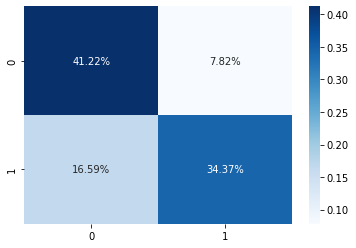

In [37]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [38]:
# Evaluation Metrics


from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(test_label,predicted_results)*100,'%')
print('Precision Macro Score',precision_score(test_label,predicted_results,average = 'macro')*100,'%')
print('Recall_Score',recall_score(test_label,predicted_results, average = 'macro')*100,'%')
print('F1_Score',f1_score(test_label,predicted_results, average = 'macro')*100,'%')

Accuracy Score 75.58997050147492 %
Precision Macro Score 76.38477593834736 %
Recall_Score 75.7493226554084 %
F1_Score 75.47460858418205 %


Text(0.5, 1.0, 'Training and validation loss')

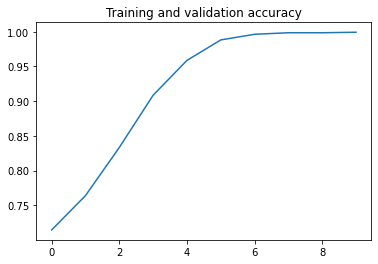

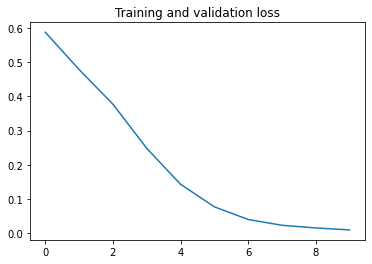

In [39]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
#val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , label ='accuracy')
#plt.plot  ( epochs, val_acc,label='val_accuracy' )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='accuracy')
#plt.plot  ( epochs, val_loss, label='val_accuracy')
plt.title ('Training and validation loss')